In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Data/df18to21_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,sentence_length,year_sentenced,sentence_type,guideline_range,imprisoned,guideline_var_pct,guideline_var_mth,dependents,count_convictons,race,education,disposition,citizen,state,criminal_hist,drug_type,case_type,age,armed_career,weapon,max_term,min_term,presentence_stat,gender,crime_type,region
0,12990,188,2018,1,1.0,1,NaN,NaN,2.0,1,1,1.0,3,1.0,Utah,1.0,3.0,1.0,24.0,0.0,0,9996.0,120.0,1.0,0.0,10,West
1,14616,0,2018,1,NaN,1,NaN,NaN,NaN,1,1,NaN,1,3.0,Virginia,1.0,NaN,NaN,28.0,NaN,0,NaN,NaN,1.0,0.0,17,South
2,14617,300,2018,1,6.0,1,NaN,NaN,2.0,3,1,1.0,3,1.0,North Dakota,1.0,6.0,1.0,41.0,0.0,1,9996.0,300.0,1.0,0.0,10,Midwest
3,14619,63,2018,1,1.0,1,NaN,NaN,0.0,1,2,1.0,1,1.0,Tennessee,1.0,NaN,1.0,25.0,0.0,1,120.0,0.0,1.0,0.0,26,South
4,14620,0,2018,1,2.0,1,NaN,NaN,NaN,1,1,NaN,1,3.0,Colorado,1.0,NaN,1.0,27.0,0.0,0,24.0,0.0,1.0,0.0,17,West


In [4]:
df.guideline_range.isna().sum()

134797

In [9]:
df.dependents.value_counts()

0.0     82146
1.0     42055
2.0     39661
3.0     28812
4.0     16386
5.0      8127
6.0      3817
7.0      1694
8.0       778
9.0       341
10.0      209
11.0      195
13.0       33
12.0       24
14.0       17
15.0       11
16.0        8
18.0        4
20.0        4
19.0        2
17.0        1
41.0        1
33.0        1
27.0        1
36.0        1
57.0        1
55.0        1
Name: dependents, dtype: int64

In [12]:
df.drug_type.isna().sum(), df.drugtypes

175983

In [4]:
df.shape

(251583, 27)

In [13]:
df.case_type.isna().sum()

4684

In [7]:
df.education.value_counts()

1.0    106304
3.0     69896
5.0     37257
6.0     12492
Name: education, dtype: int64

In [8]:
df.citizen.value_counts()

1.0    144630
3.0     94639
2.0      7745
4.0      2019
5.0      1080
Name: citizen, dtype: int64

In [7]:
df.race.value_counts(), df.gender.value_counts()

(1    181873
 2     55677
 3      5330
 7      4897
 4      3806
 Name: race, dtype: int64,
 0.0    219468
 1.0     31728
 Name: gender, dtype: int64)

In [8]:
df.citizen.value_counts(), df.education.value_counts(), df.region.value_counts()

(1.0    144630
 3.0     94639
 2.0      7745
 4.0      2019
 5.0      1080
 Name: citizen, dtype: int64,
 1.0    106304
 3.0     69896
 5.0     37257
 6.0     12492
 Name: education, dtype: int64,
 South        132964
 West          64412
 Midwest       28493
 Northeast     21664
 Name: region, dtype: int64)

In [9]:
df.race.isna().sum(), df.gender.isna().sum(), df.age.isna().sum(), df.citizen.isna().sum(), df.region.isna().sum()

(0, 387, 181, 1470, 4050)

In [10]:
df.dependents.isna().sum(), df.education.isna().sum()

(27252, 25634)

In [11]:
#Dropping rows with NAN in demo features
#Ignoring 'education' and 'dependents' for now, both have high numbers of NAN
df_cln = df.dropna(subset= ['race', 'gender', 'citizen', 'region', 'age'])  

In [12]:
# Column Transformer to OneHotEncode/Scale demo features
ohe = OneHotEncoder(drop=None, handle_unknown='ignore', sparse=False) 
sc = StandardScaler()
ct = make_column_transformer(
    (ohe, ['race', 'gender', 'citizen', 'region']),   # , 'education'
    (sc, ['age']),                                       # , 'dependents'
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [13]:

# df_cln_demo = pd.DataFrame(ct.fit_transform(df_cln), columns=ct.get_feature_names_out())
# df_cln_demo

#### Analysis CASETYPE(split into Felony/Misdemeanor), Target is TOTPRISN(months imprisonment)

In [14]:
df_cln.sentence_length.isna().sum()

0

In [15]:
(df_cln.sentence_length == 0).sum(), (df_cln.sentence_length > 0).sum()

(75458, 170406)

In [16]:
df_cln.case_type.value_counts()

1.0    234118
2.0      7243
Name: case_type, dtype: int64

In [17]:
df_felony = df[df['case_type'] == 1]

In [56]:
X = df_cln[['race', 'gender', 'citizen', 'region', 'age']]
y = df_cln['sentence_length']

In [19]:
X = pd.DataFrame(ct.fit_transform(X), columns=ct.get_feature_names_out())
X

,race_1,race_2,race_3,race_4,race_7,gender_0.0,gender_1.0,citizen_1.0,citizen_2.0,citizen_3.0,citizen_4.0,citizen_5.0,region_Midwest,region_Northeast,region_South,region_West,age
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.142281
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.776569
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.411993
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.050853
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.867997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245859,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.611969
245860,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.776569
245861,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.959425
245862,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.503421


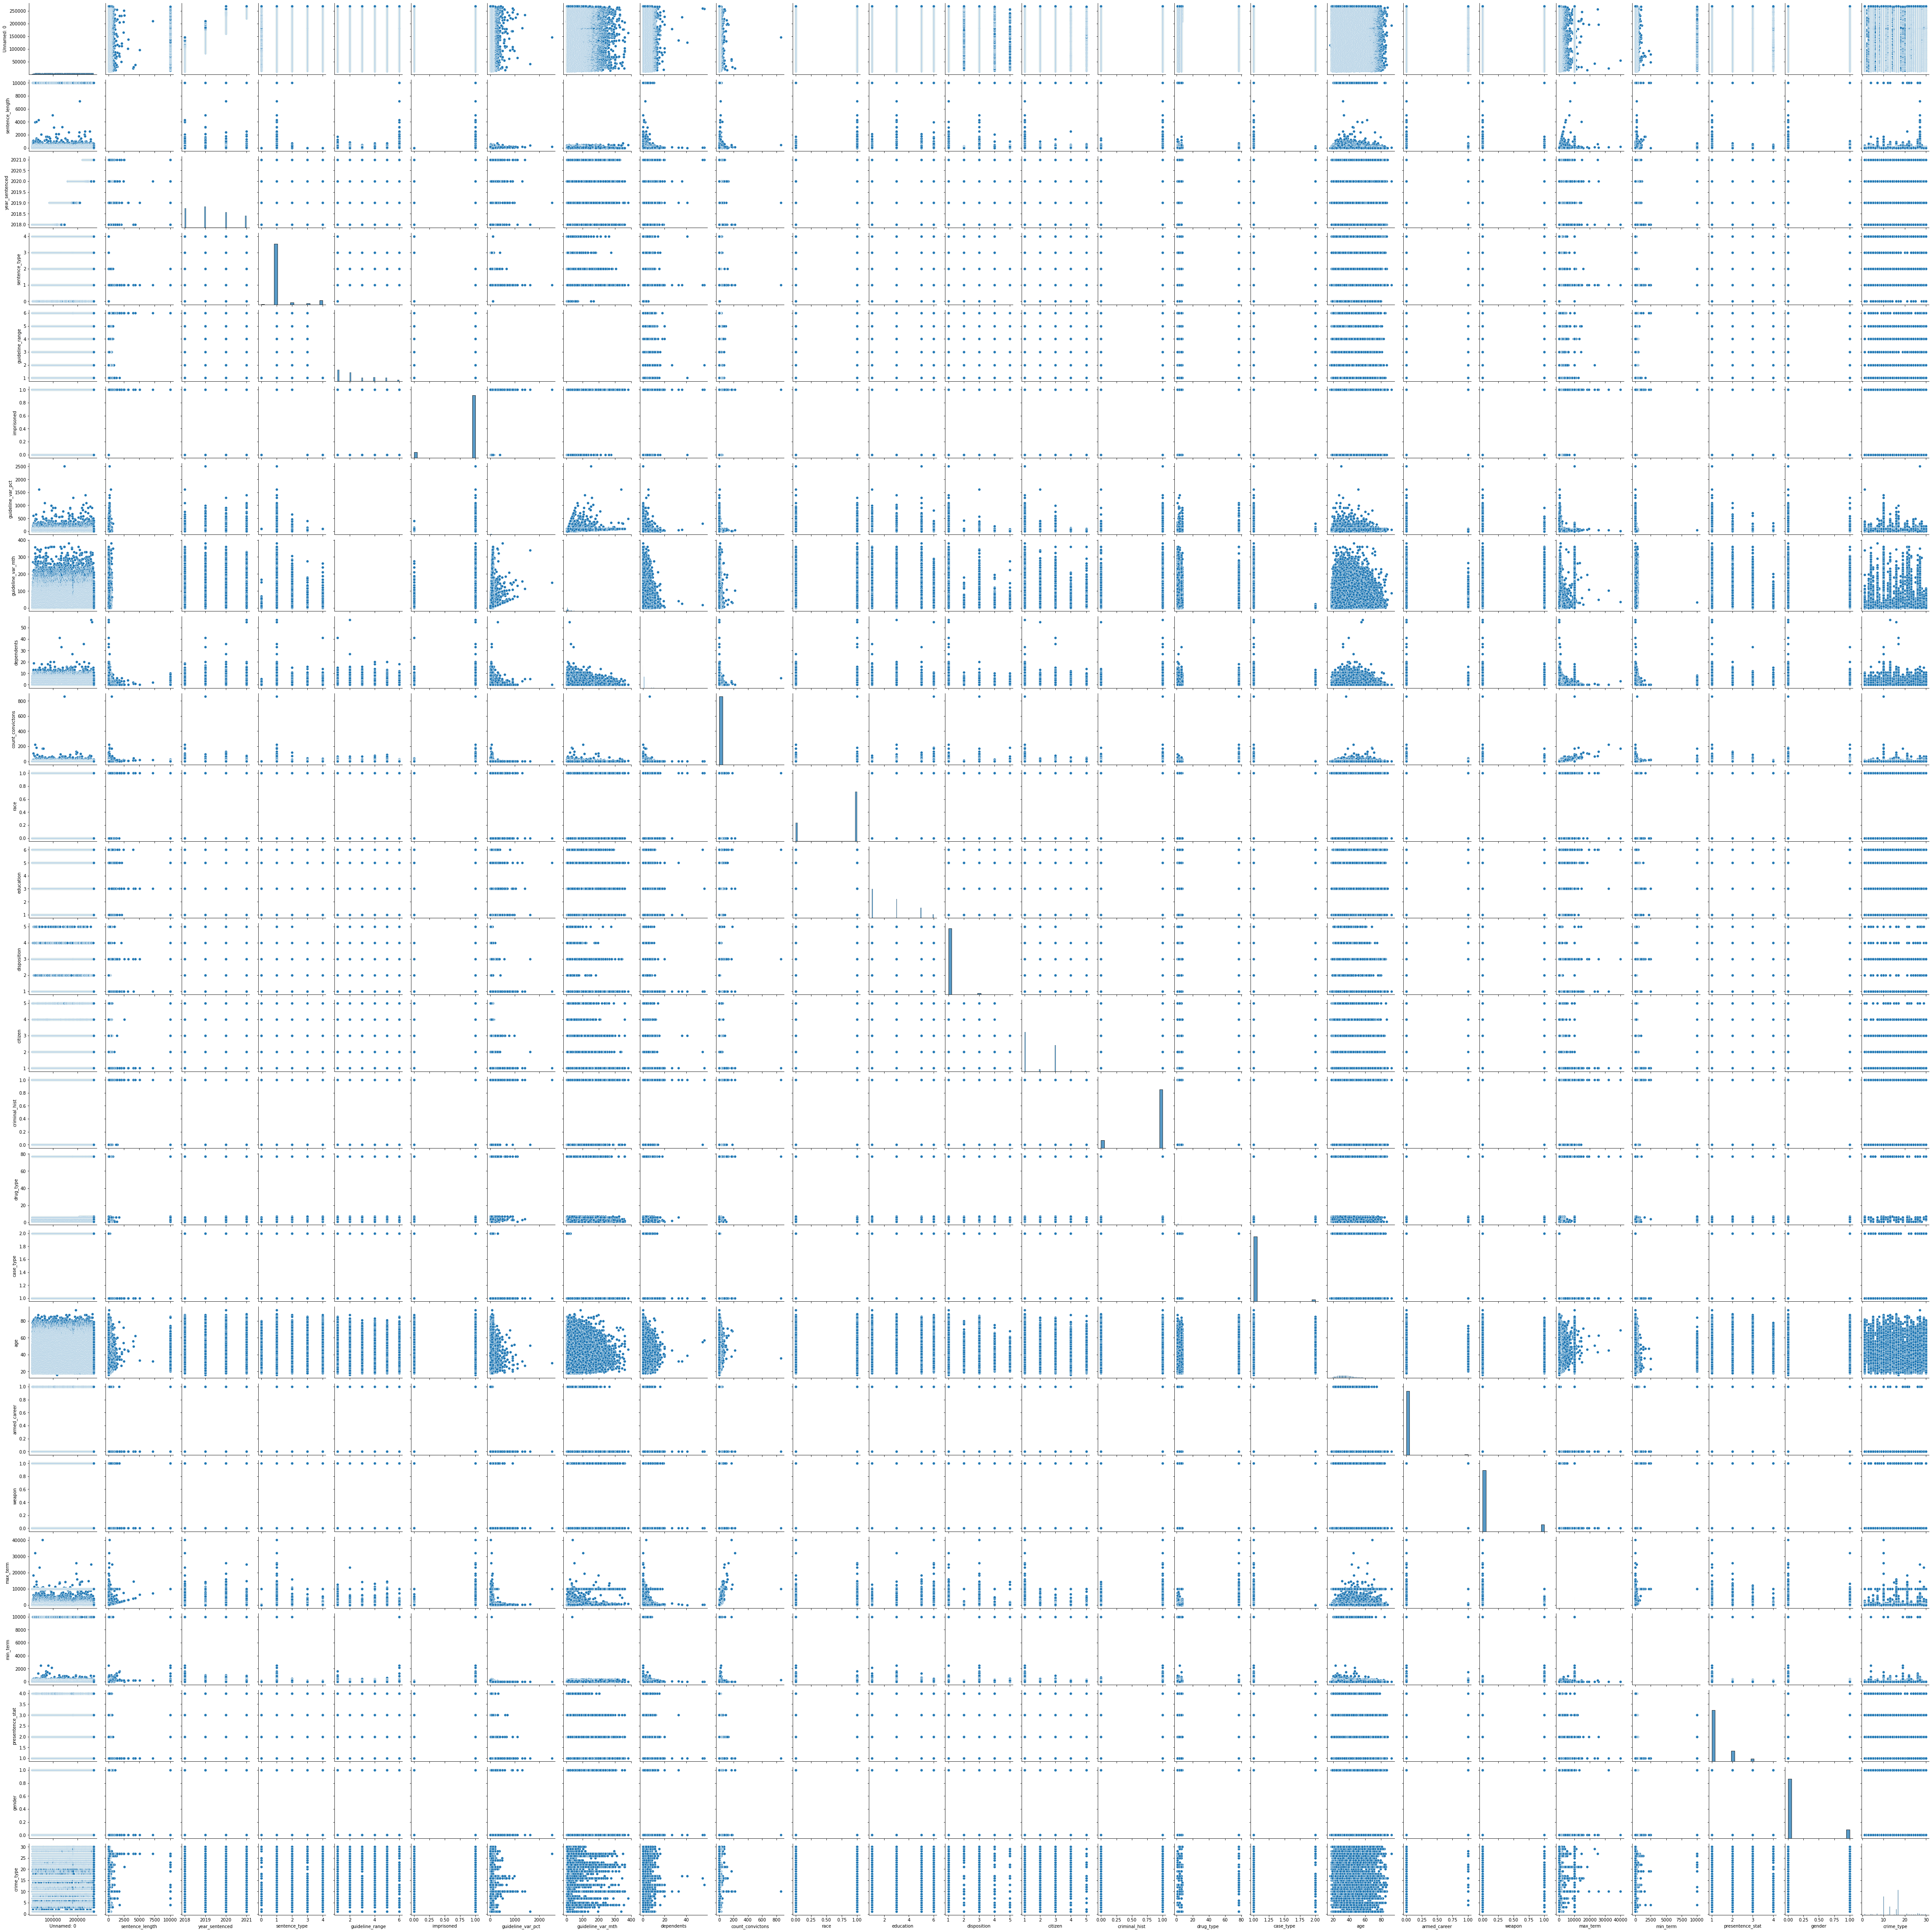

In [49]:
sns.pairplot(df_cln)

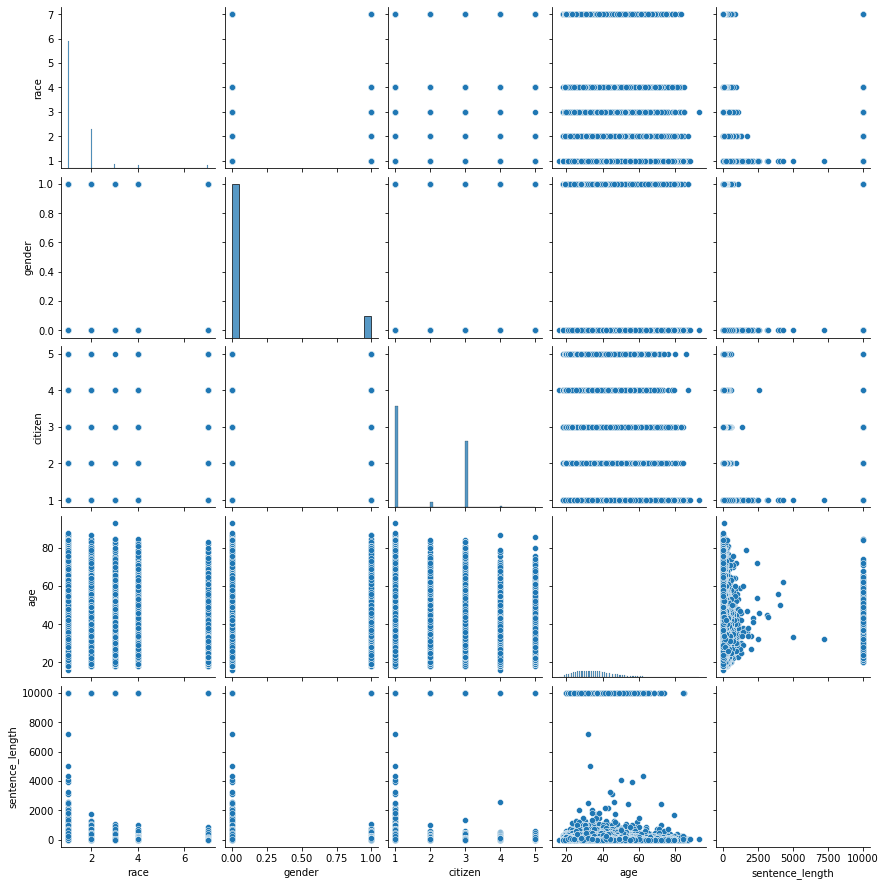

In [59]:
sns.pairplot(df[['race', 'gender', 'citizen', 'region', 'age', 'sentence_length']]) #, hue='sentence_length')

In [60]:
(df[['race', 'gender', 'citizen', 'region', 'age', 'sentence_length']]).corr()

,race,gender,citizen,age,sentence_length
race,1.000000,0.005660,-0.197584,-0.019538,0.016366
gender,0.005660,1.000000,-0.171198,0.017693,-0.027739
citizen,-0.197584,-0.171198,1.000000,-0.054007,-0.072996
age,-0.019538,0.017693,-0.054007,1.000000,0.019445
sentence_length,0.016366,-0.027739,-0.072996,0.019445,1.000000


In [21]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)


0.009170872743847314

In [22]:
pd.DataFrame(lr.coef_, X.columns)      

,0
race_1,-4.367030e+13
race_2,-4.367030e+13
race_3,-4.367030e+13
race_4,-4.367030e+13
race_7,-4.367030e+13
gender_0.0,2.525434e+12
gender_1.0,2.525434e+12
citizen_1.0,-5.844760e+12
citizen_2.0,-5.844760e+12
citizen_3.0,-5.844760e+12


#### No significant relationship with any feature other than age. Next, variables will be isolated and made binary.

In [23]:
# LR with just age(not scaled)
X = df_cln[['age']]
y = df_cln['sentence_length']
lr.fit(X, y)
lr.score(X, y)

0.0003810845785314765

In [24]:
lr.coef_

array([0.71096935])

In [25]:
df_cln['race'].value_counts()

1    179447
2     53972
3      5317
4      3592
7      3536
Name: race, dtype: int64

In [43]:
# Make race binary (white=1, minority=0)
df_cln.loc[df_cln['race'] != 1, 'race'] = 0
df_cln['race'].value_counts()
#df['race'] = df['race'].apply(lambda x:1 if x == 1 else 0)

C:\Users\jswil\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1    179447
0     66417
Name: race, dtype: int64

In [40]:
df_cln[df_cln['race'] == 1]

,Unnamed: 0,sentence_length,year_sentenced,sentence_type,guideline_range,imprisoned,guideline_var_pct,guideline_var_mth,dependents,count_convictons,race,education,disposition,citizen,state,criminal_hist,drug_type,case_type,age,armed_career,weapon,max_term,min_term,presentence_stat,gender,crime_type,region
0,12990,188,2018,1,1.0,1,NaN,NaN,2.0,1,1,1.0,3,1.0,Utah,1.0,3.0,1.0,24.0,0.0,0,9996.0,120.0,1.0,0.0,10,West
1,14616,0,2018,1,NaN,1,NaN,NaN,NaN,1,1,NaN,1,3.0,Virginia,1.0,NaN,NaN,28.0,NaN,0,NaN,NaN,1.0,0.0,17,South
2,14617,300,2018,1,6.0,1,NaN,NaN,2.0,3,1,1.0,3,1.0,North Dakota,1.0,6.0,1.0,41.0,0.0,1,9996.0,300.0,1.0,0.0,10,Midwest
4,14620,0,2018,1,2.0,1,NaN,NaN,NaN,1,1,NaN,1,3.0,Colorado,1.0,NaN,1.0,27.0,0.0,0,24.0,0.0,1.0,0.0,17,West
5,14621,10,2018,1,1.0,1,NaN,NaN,2.0,1,1,1.0,1,3.0,Texas,1.0,NaN,1.0,26.0,0.0,0,120.0,0.0,1.0,0.0,17,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251574,267806,37,2021,1,5.0,1,NaN,NaN,2.0,1,1,1.0,1,3.0,Texas,1.0,NaN,1.0,28.0,0.0,0,240.0,0.0,1.0,0.0,17,South
251576,267808,0,2021,1,NaN,1,NaN,NaN,NaN,1,1,NaN,1,3.0,Texas,1.0,NaN,NaN,29.0,NaN,0,NaN,NaN,NaN,0.0,17,South
251577,267809,0,2021,4,NaN,0,100.00,10.0,0.0,1,1,5.0,1,1.0,New York,1.0,4.0,1.0,76.0,0.0,0,60.0,0.0,2.0,0.0,10,Northeast
251578,267810,132,2021,1,NaN,1,2.22,3.0,0.0,2,1,5.0,1,1.0,New York,1.0,NaN,1.0,28.0,0.0,1,9996.0,84.0,1.0,0.0,26,Northeast


In [41]:
df_cln[df_cln['race'] != 1]

,Unnamed: 0,sentence_length,year_sentenced,sentence_type,guideline_range,imprisoned,guideline_var_pct,guideline_var_mth,dependents,count_convictons,race,education,disposition,citizen,state,criminal_hist,drug_type,case_type,age,armed_career,weapon,max_term,min_term,presentence_stat,gender,crime_type,region
3,14619,63,2018,1,1.0,1,NaN,NaN,0.0,1,0,1.0,1,1.0,Tennessee,1.0,NaN,1.0,25.0,0.0,1,120.0,0.0,1.0,0.0,26,South
12,14628,90,2018,1,NaN,1,26.760563,19.00,0.0,1,0,1.0,1,1.0,Michigan,1.0,NaN,1.0,21.0,0.0,0,120.0,0.0,1.0,0.0,13,Midwest
14,14682,188,2018,1,1.0,1,NaN,NaN,0.0,1,0,3.0,1,1.0,Tennessee,1.0,6.0,1.0,31.0,0.0,0,9996.0,120.0,1.0,0.0,10,South
17,14690,4,2018,2,2.0,1,NaN,NaN,1.0,1,0,1.0,1,1.0,South Dakota,1.0,6.0,1.0,23.0,0.0,0,240.0,0.0,1.0,0.0,10,Midwest
21,14694,0,2018,1,4.0,1,NaN,NaN,1.0,1,0,3.0,1,1.0,Missouri,1.0,NaN,1.0,46.0,0.0,0,360.0,0.0,2.0,0.0,16,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251567,267799,0,2020,4,1.0,0,NaN,NaN,0.0,1,0,5.0,1,1.0,Georgia,1.0,NaN,1.0,37.0,0.0,0,60.0,0.0,3.0,1.0,16,South
251568,267800,0,2021,1,NaN,1,99.880000,23.97,1.0,1,0,5.0,1,1.0,Michigan,1.0,NaN,1.0,40.0,0.0,0,60.0,0.0,2.0,1.0,16,Midwest
251575,267807,70,2021,1,1.0,1,NaN,NaN,2.0,1,0,5.0,1,1.0,Oklahoma,1.0,NaN,1.0,44.0,0.0,0,120.0,0.0,1.0,0.0,13,South
251580,267812,372,2021,1,NaN,1,NaN,NaN,0.0,2,0,1.0,1,1.0,New York,1.0,NaN,1.0,26.0,0.0,1,9996.0,180.0,1.0,0.0,22,Northeast


1    179447
0     66417
Name: race, dtype: int64

In [45]:
X = df_cln[['race']]
y = df_cln['sentence_length']
lr.fit(X, y)
lr.score(X, y)

0.002719275801258192

In [46]:
lr.coef_

array([-46.78164034])

In [47]:
df_cln[df_cln['race'] == 1].sentence_length.mean()

44.87660980679532

In [48]:
df_cln[df_cln['race'] != 1].sentence_length.mean()

91.65825014679976